In [10]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import seaborn as sns
import scipy.stats as stats
% matplotlib inline

# Analysis of the experiment

In [3]:
control=pd.read_excel("ab_test.xlsx",sheetname=0)
exp=pd.read_excel("ab_test.xlsx",sheetname=1)

In [4]:
for df in [control,exp]:
    df['gross_conversion']=df['Enrollments']/df['Clicks']
    df['net_conversion']=df['Payments']/df['Clicks']

In [42]:
control.head(5)

,Date,Pageviews,Clicks,Enrollments,Payments,gross_conversion,net_conversion
0,"Sat, Oct 11",7723,687,134.0,70.0,0.195051,0.101892
1,"Sun, Oct 12",9102,779,147.0,70.0,0.188703,0.089859
2,"Mon, Oct 13",10511,909,167.0,95.0,0.183718,0.104510
3,"Tue, Oct 14",9871,836,156.0,105.0,0.186603,0.125598
4,"Wed, Oct 15",10014,837,163.0,64.0,0.194743,0.076464


## normality test

(0.9253936409950256, 0.0057845949195325375)


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


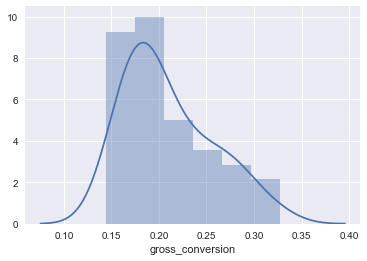

In [44]:
print(stats.shapiro(control.dropna()['gross_conversion']))
sns.distplot(control['gross_conversion'].dropna(),bins=6)
print(stats.shapiro(exp.dropna()['gross_conversion']))
sns.distplot(exp['gross_conversion'].dropna(),bins=6)

(0.9808908700942993, 0.6426108479499817)


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


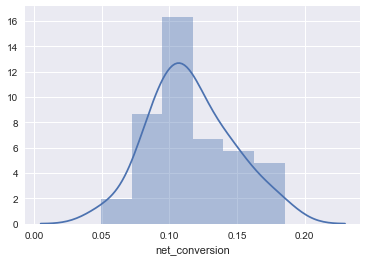

In [45]:
print(stats.shapiro(pd.concat([control.dropna()['net_conversion'],exp.dropna()['net_conversion']])))
sns.distplot(pd.concat([control.dropna()['net_conversion'],exp.dropna()['net_conversion']]),bins=6)

In [27]:
control['gross_conversion']

0     0.195051
1     0.188703
2     0.183718
3     0.186603
4     0.194743
5     0.167679
6     0.195187
7     0.174051
8     0.189580
9     0.191638
10    0.226067
11    0.193317
12    0.190977
13    0.326895
14    0.254703
15    0.227401
16    0.306983
17    0.209239
18    0.265223
19    0.227520
20    0.246459
21    0.229075
22    0.297258
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
Name: gross_conversion, dtype: float64

## test of equal variance between samples

In [29]:
stats.levene(control['gross_conversion'].dropna(),exp['gross_conversion'].dropna(),center='mean')

LeveneResult(statistic=0.60750570572593543, pvalue=0.43990084740269786)

In [30]:
stats.levene(control['net_conversion'].dropna(),exp['net_conversion'].dropna(),center='mean')

LeveneResult(statistic=0.19898940293607756, pvalue=0.6577253622471253)

In [ ]:
# our samples are iid, normally distr. and homogeneous var

## T_test (not robust because violated normality assumption)

In [46]:
w1=control.dropna()['Clicks']
w2=exp.dropna()['Clicks']

In [47]:
ttest_ind(control.dropna()['gross_conversion'],exp.dropna()['gross_conversion'],usevar = 'pooled',
           weights=(w1,w2)
          )

(43.14007486744017, 0.0, 34551.0)

In [48]:
ttest_ind(control.dropna()['net_conversion'],exp.dropna()['net_conversion'],usevar = 'pooled',
           weights=(w1,w2)
          )

(15.238474169068644, 2.9059682850513079e-52, 34551.0)

## Mann Whitney U

In [54]:
stats.mannwhitneyu(control['gross_conversion'].dropna(),exp['gross_conversion'].dropna(),alternative='greater')

MannwhitneyuResult(statistic=359.0, pvalue=0.019456629160861796)

In [55]:
stats.mannwhitneyu(control['net_conversion'].dropna(),exp['net_conversion'].dropna(),alternative='less')

MannwhitneyuResult(statistic=276.0, pvalue=0.60396754448455758)